### **`Data Preprocessing`**

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading library for Decision tree model...
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,   recall_score,log_loss, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib as plt

# read the dataset file
df = pd.read_csv('./ckd-dataset-v2.csv')

# check the top 5 rows of dataframe
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [2]:
# as we can see row 0 and 1 contain garbadge values so we can delete these two rows
df.drop([0,1],axis=0,inplace=True)

# reset the index after droping row 1 and 2
df = df.reset_index(drop=True)

# again check the top 5 extries 
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [3]:
# check if there is any null/NaN entry present in our dataframe
df.isnull().values.any()

False

As we can see we don't have any `row/column` having `Null/NaN` value in it

In [4]:
# seperate features and target variables 
X = df.drop(['class'], axis=1)
Y = df['class']

From now `X` and `Y` is our `Feature` and `Target` columns respectively

In [5]:
# check for unique classes in target column
Y.unique()

array(['ckd', 'notckd'], dtype=object)

In [6]:
# convert the categories of target ("ckd", "notckd") to (1, 0) 
Y = Y.map({'ckd': 1, 'notckd': 0})

<AxesSubplot: >

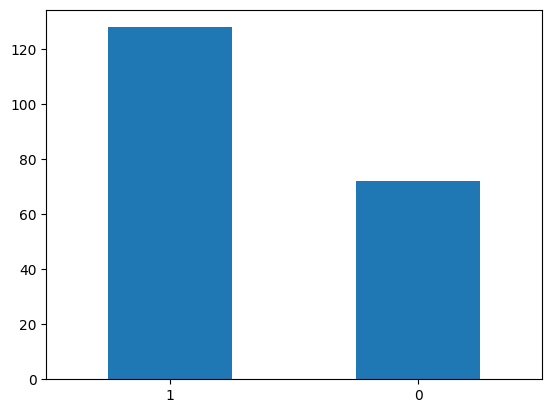

In [7]:
# Check for class imballance problem
Y.value_counts().plot.bar(rot=0)

we are having **`70-75` notckd** and almost **`125 ckd`** data points. <br />
So, we could say that we don't have serious `class-imballance` problem in dataset. <br />
Now our focus is on `Feature valiables`

In [8]:
X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,0,< 0,0,0,0,< 112,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [9]:
X['stage'].unique()

array(['s1', 's4', 's3', 's2', 's5'], dtype=object)

Convert the categories of **`stage`** column (s1, s2,...) in to number (1, 2,...)

In [10]:
X['stage'] = X['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

Removing '<','>' and '-' while keeping the suitable values

In [11]:
#Removed all unnecessary whitespaces 
#Found average of values given in range
#Addded 1 after removing '>', Subtracted 1 after removing '<' and kept the first value when values are given in range like "3-6" and the original value when there was '≥' 



regexp = re.compile(r'≥|≤')

X = X.applymap(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
X = X.applymap(lambda x: (float(str(x).split('-')[0])+float(str(x).split('-')[1]))/2 if '-' in str(x) else x) 
X = X.applymap(lambda x: float(x[1:])-1 if '<' in str(x) else (str(x).replace('≥','').replace('≤','') if regexp.search(str(x)) else(float(x[1:])+1 if '>' in str(x) else x )))


X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,...,0,0,0,0,0,0,227.944,1,1,11.0
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,...,0,0,0,0,0,0,227.944,1,1,11.0
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,...,0,0,0,1,0,0,139.8635,1,1,11.0
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,...,0,0,0,0,0,0,139.8635,1,1,11.0
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,...,0,1,0,1,1,0,139.8635,1,1,16.0


In [12]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df1 = df[col_list]
    return df1
dataSet = swap_columns(X, "affected","age")

In [13]:
dataSet.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,age,affected
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,...,0,0,0,0,0,0,227.944,1,11.0,1
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,...,0,0,0,0,0,0,227.944,1,11.0,1
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,...,0,0,0,1,0,0,139.8635,1,11.0,1
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,...,0,0,0,0,0,0,139.8635,1,11.0,1
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,...,0,1,0,1,1,0,139.8635,1,16.0,1


In [14]:
# make grf float and update p value

# take the mean value for puting instead 'p'
n = dataSet.loc[dataSet['grf'] != 'p']
meanValue = n['grf'].astype(float).mean()
meanValue



69.96813366834172

In [15]:
# replace p with average of colomn 
for ind in dataSet.index:
    if dataSet['grf'][ind] == 'p':
        dataSet['grf'][ind] = dataSet['grf'][ind].replace('p',str(meanValue))

# change the type of coloumn
dataSet['grf'] = dataSet['grf'].astype(float)
dataSet['grf']

C:\Users\Bilal Khatri\AppData\Local\Temp\ipykernel_11816\198849226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['grf'][ind] = dataSet['grf'][ind].replace('p',str(meanValue))


0      227.94400
1      227.94400
2      139.86350
3      139.86350
4      139.86350
         ...    
195     39.20035
196     25.61750
197     64.36610
198    114.69800
199     25.61750
Name: grf, Length: 200, dtype: float64

In [16]:
dataSet.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,age,affected
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,...,0,0,0,0,0,0,227.9440,1,11.0,1
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,...,0,0,0,0,0,0,227.9440,1,11.0,1
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,...,0,0,0,1,0,0,139.8635,1,11.0,1
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,...,0,0,0,0,0,0,139.8635,1,11.0,1
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,...,0,1,0,1,1,0,139.8635,1,16.0,1


In [17]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    object 
 1   bp limit        200 non-null    object 
 2   sg              200 non-null    object 
 3   al              200 non-null    object 
 4   rbc             200 non-null    object 
 5   su              200 non-null    object 
 6   pc              200 non-null    object 
 7   pcc             200 non-null    object 
 8   ba              200 non-null    object 
 9   bgr             200 non-null    object 
 10  bu              200 non-null    object 
 11  sod             200 non-null    object 
 12  sc              200 non-null    object 
 13  pot             200 non-null    object 
 14  hemo            200 non-null    object 
 15  pcv             200 non-null    object 
 16  rbcc            200 non-null    object 
 17  wbcc            200 non-null    obj

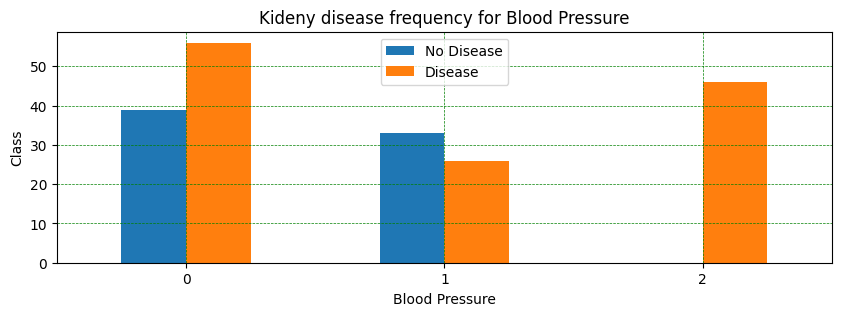

In [18]:
import matplotlib.pyplot as plt
# Relation between Kideny Disease and Blood Pressure
plt.rcParams["figure.figsize"] = (10,3)
pd.crosstab(dataSet['bp limit'], dataSet['affected']).plot(kind="bar")
plt.title("Kideny disease frequency for Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Class")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0); # rotate the numbers on x axis
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5, )

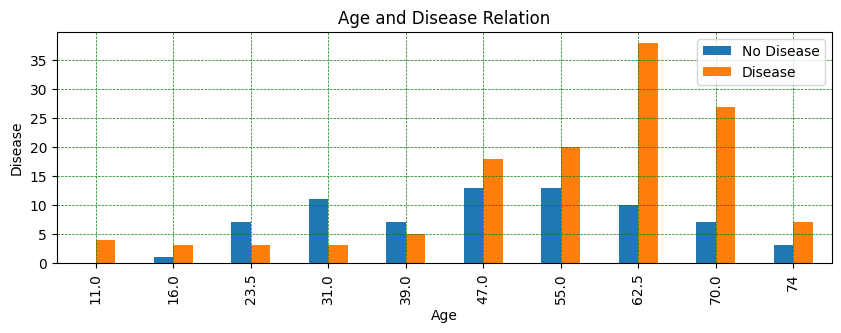

In [19]:
# Relation between Kideny Disease and Age

plt.rcParams["figure.figsize"] = (10,3)
pd.crosstab(dataSet.age, dataSet['affected']).plot(kind="bar")
plt.title("Age and Disease Relation")
plt.xlabel("Age")
plt.ylabel("Disease")
plt.legend(["No Disease", "Disease"]);
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5, )

C:\Users\Bilal Khatri\AppData\Local\Temp\ipykernel_11816\3179436892.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_metricx=dataSet.corr()


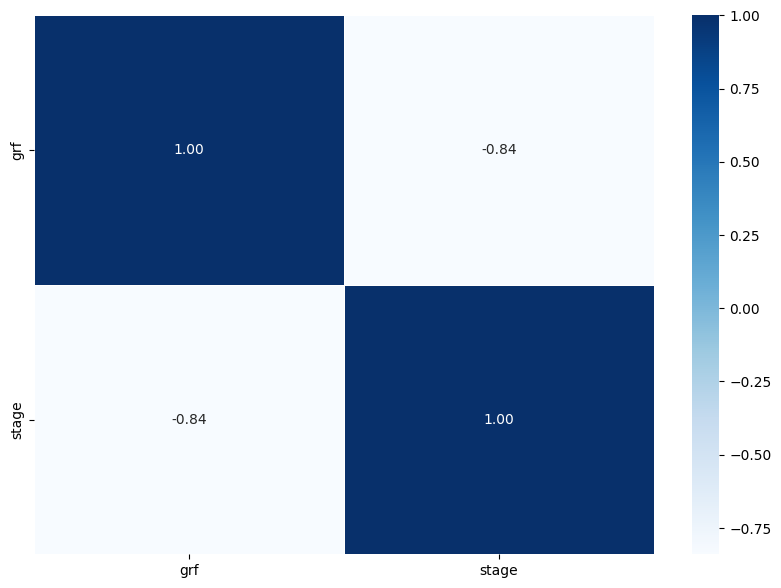

In [20]:
# Corellation

cor_metricx=dataSet.corr()
fig, axis=plt.subplots(figsize=(10,7))
axis=sns.heatmap(cor_metricx, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues") # annot-->numbers inside boxs

In [21]:
dataSet.shape

(200, 28)

In [22]:
# Split dependent and independent variables...
x = dataSet.iloc[:, 0:-1]
y = dataSet.iloc[:, -1]

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affected, dtype: object

In [24]:
x.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,...,8550.0,0,0,0,0,0,0,227.9440,1,11.0
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,...,13310.0,0,0,0,0,0,0,227.9440,1,11.0
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,...,15690.0,0,0,0,1,0,0,139.8635,1,11.0
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,...,8550.0,0,0,0,0,0,0,139.8635,1,11.0
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,...,8550.0,0,1,0,1,1,0,139.8635,1,16.0


In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.25, random_state=0)

print("Shape of xTrain : ",xTrain.shape)
print("Shape of xTest : ",xTest.shape)
print("Shape of yTrain : ",yTrain.shape)
print("Shape of yTest : ",yTest.shape)

Shape of xTrain :  (150, 27)
Shape of xTest :  (50, 27)
Shape of yTrain :  (150,)
Shape of yTest :  (50,)


In [26]:
model = DecisionTreeClassifier(criterion="gini",random_state=0)


In [27]:
model.fit(xTrain,yTrain)

DecisionTreeClassifier(random_state=0)

In [28]:
model.score(xTest,yTest)

0.94

In [29]:
# accuracy_score, precision_score, f1_score, 


In [30]:
# make predictions on test dataset using trained model
yPred = model.predict(xTest)

# confusion matrix to see where this model get confuse
confusion_matrix(yTest, yPred)

array([[17,  3],
       [ 0, 30]], dtype=int64)

C:\Users\Bilal Khatri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


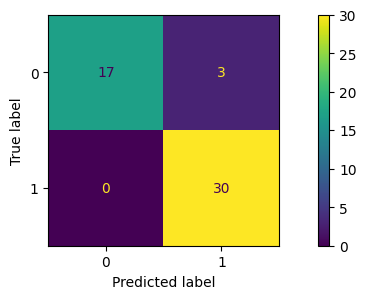

In [31]:
# plot the above confusion matrix
plot_confusion_matrix(model, xTest, yTest)  
plt.show()

In [32]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.91      1.00      0.95        30

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



In [33]:
log = log_loss(yTest, yPred)
print('Log Loss: %.3f' % log)

Log Loss: 2.072


In [34]:
roc_auc = roc_auc_score(yTest, yPred)
print('ROC_AUC: %.3f' % roc_auc)

ROC_AUC: 0.925


In [35]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       15, 20, 30, 40, 50, 70, 90, 120, 150]})

In [36]:
# print('Best Criterion:', clf.best_estimator_.get_params()['dec_tree__criterion'])
print(clf.best_params_)
print(clf.score(xTest, yTest))

{'criterion': 'gini', 'max_depth': 2}
0.94
